Installed Spark

In [2]:
!pip install pyspark

from pyspark import *
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
from pyspark.sql.types import *


sc = SparkContext.getOrCreate()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 18.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=3128572952c0e70e44f179cdbf87bb0898dab98d6c19907466019efa9af76f77
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


Import file

In [3]:
from google.colab import files

In [4]:
uploaded = files.upload() 
#If you haven't uploaded the data file, upload here. Remember to modify the path in next lie

Saving movie.csv to movie.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp

Data reading and processing

In [6]:
movievs = pd.read_csv('movie.csv', sep=',')
movievs.head()
print(movievs.head())
movievs.info()
colnm = movievs.columns.to_list()
print(colnm)

   id  movie_name  first_day_sell  first_week_sell  total_sell  avg_price  \
0   1       流浪地球2         47962.0          47962.0    402444.0       54.5   
1   2         满江红         40593.5          40539.5    454344.2       53.0   
2   3          无名         13744.4          54411.2     93057.0       44.0   
3   4  熊出没·伴我“熊芯”         13373.3          84653.3    148614.1       51.0   
4   5        交换人生         12727.0          30346.3     39345.6       53.0   

   PV_watched  score  year  
0      3126.8    9.3  2023  
1      3367.0    9.4  2023  
2      1076.8    9.0  2023  
3      2405.4    9.2  2023  
4      1013.4    8.6  2023  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               37 non-null     int64  
 1   movie_name       37 non-null     object 
 2   first_day_sell   37 non-null     float64
 3   first_week_sell  37 non-nu

不同年份上映电影数量统计

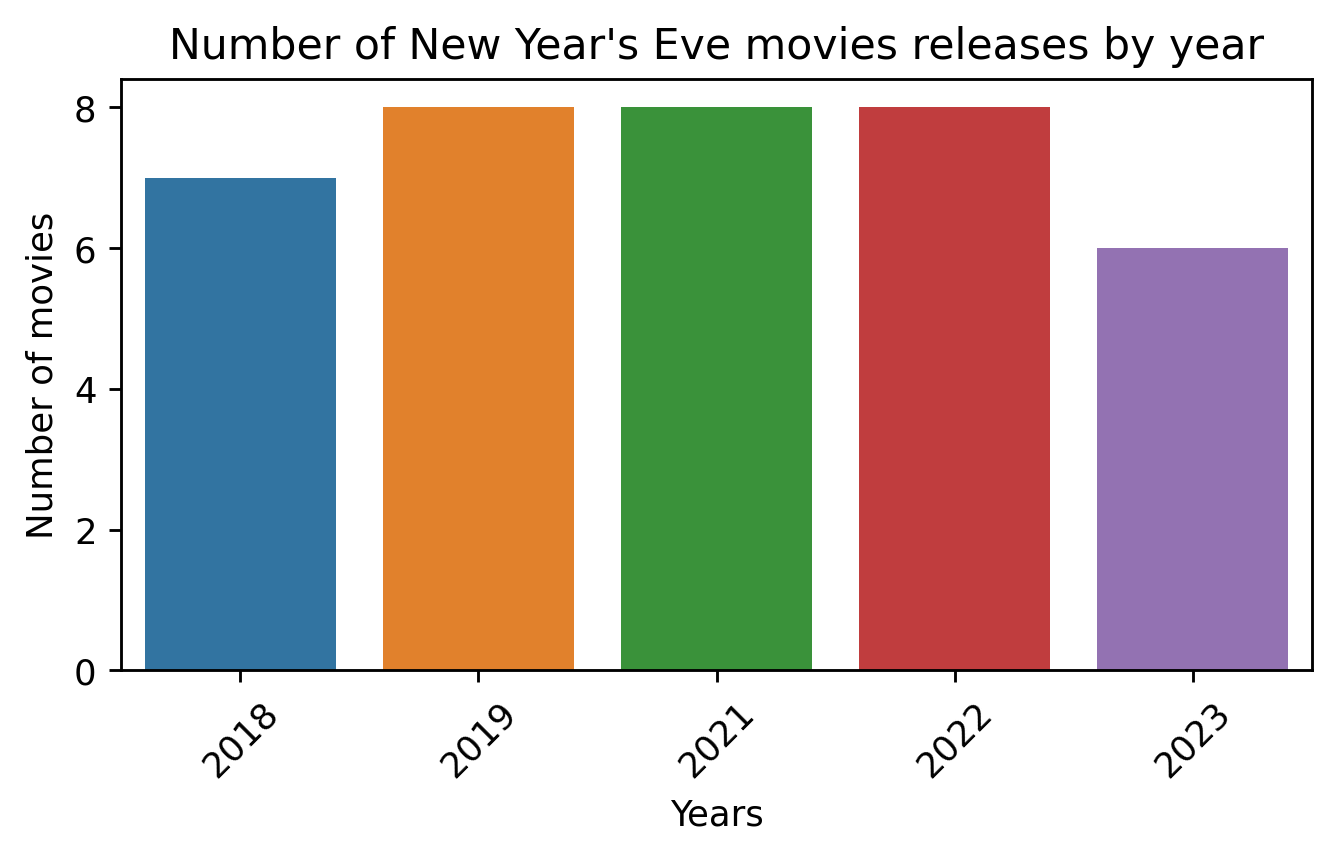

In [7]:
p1=movievs.year.value_counts()
plt.figure(figsize = (6,3),dpi=256)
sns.barplot(x=p1.index,y=p1)
plt.ylabel('Number of movies')
plt.xlabel('Years')
plt.xticks(fontsize=10,rotation=45)
plt.title("Number of New Year's Eve movies releases by year")
plt.show()

电影评分分布

<ipython-input-17-623a4377bda7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movievs['score'], kde=True, bins=37)


Text(0.5, 1.0, 'Distribution of film rate')

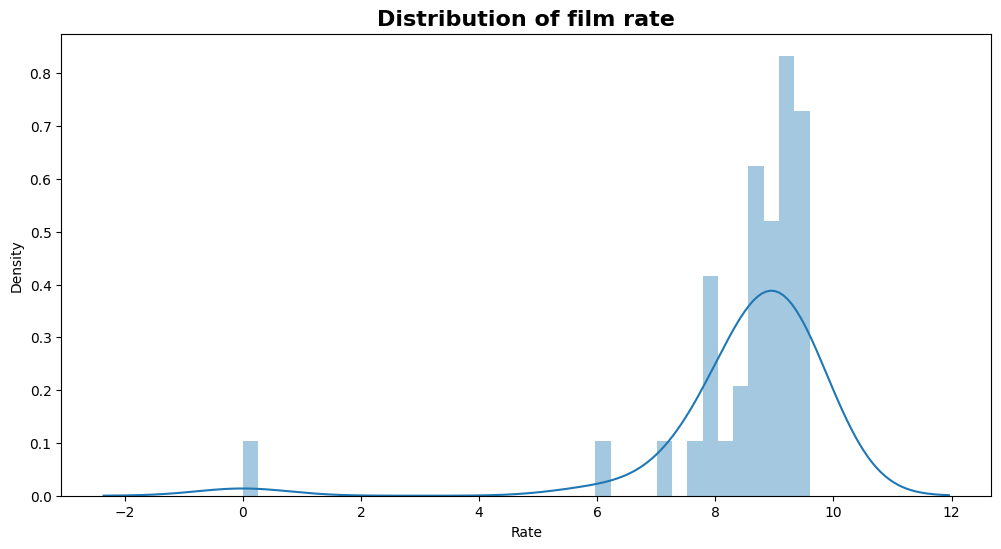

In [17]:
plt.figure(figsize=(12, 6))
p2=movievs.score.value_counts()
sns.distplot(movievs['score'], kde=True, bins=37)
plt.xlabel('Rate')
plt.title('Distribution of film rate', fontsize=16, weight='bold')

电影评分与电影票房相关性

In [14]:

plt.scatter(movievs['score'], movievs['total_sell'], s=40, c='blue')
plt.title('The Correlation between film ratings and box office', fontsize=16, weight='bold')
plt.ylabel('Total Box Office')
plt.xlabel('Rate')
plt.show()

电影上映年份与观影人数分布

In [29]:
plt.figure(figsize=(12, 8))
p6=movievs['total_sell']/movievs['avg_price']
sns.boxplot(x="year", y=p6, data=movievs, linewidth=1.5)
plt.title('Correlation between year and number of moviegoers', fontsize=16, weight='bold')
plt.ylabel('Number of moviegoers')
plt.xlabel('Year')
plt.show()



不同年份上映的电影票房分布情况

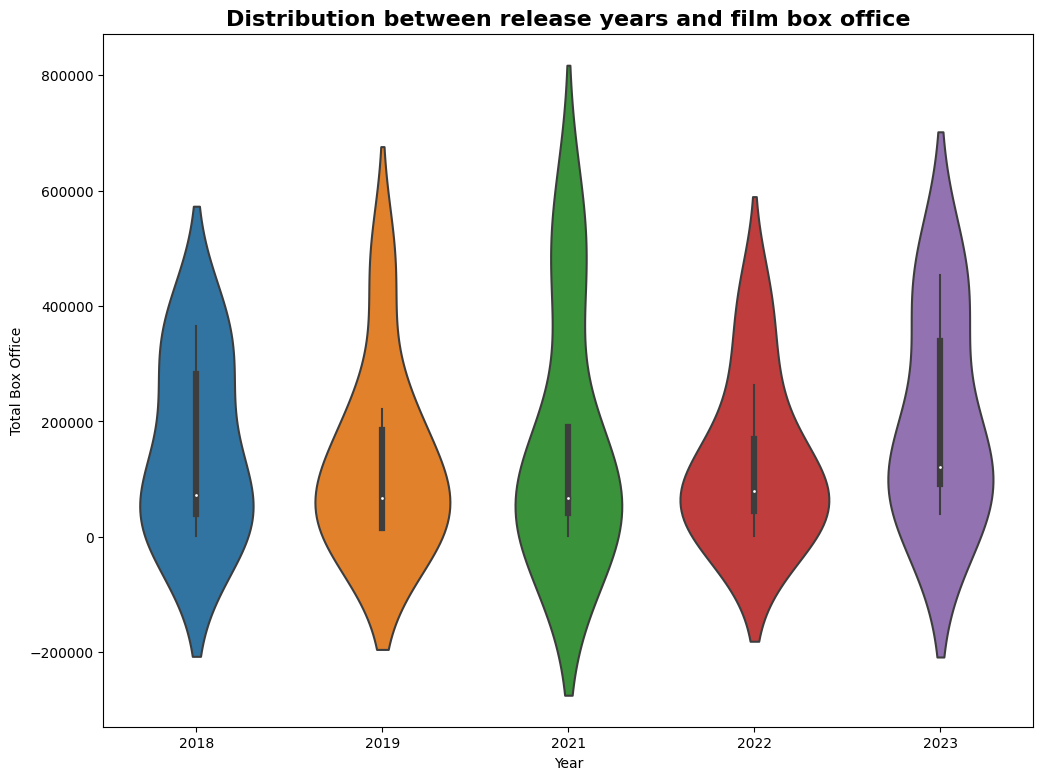

In [30]:
plt.figure(figsize=(12, 9))
sns.violinplot(x="year", y=movievs['total_sell'], data=movievs, linewidth=1.5)
plt.xlabel('Year')
plt.ylabel('Total Box Office')
plt.title('Distribution between release years and film box office', fontsize=16, weight='bold')
plt.show()

电影总票房与电影票价和电影首日票房的相关性

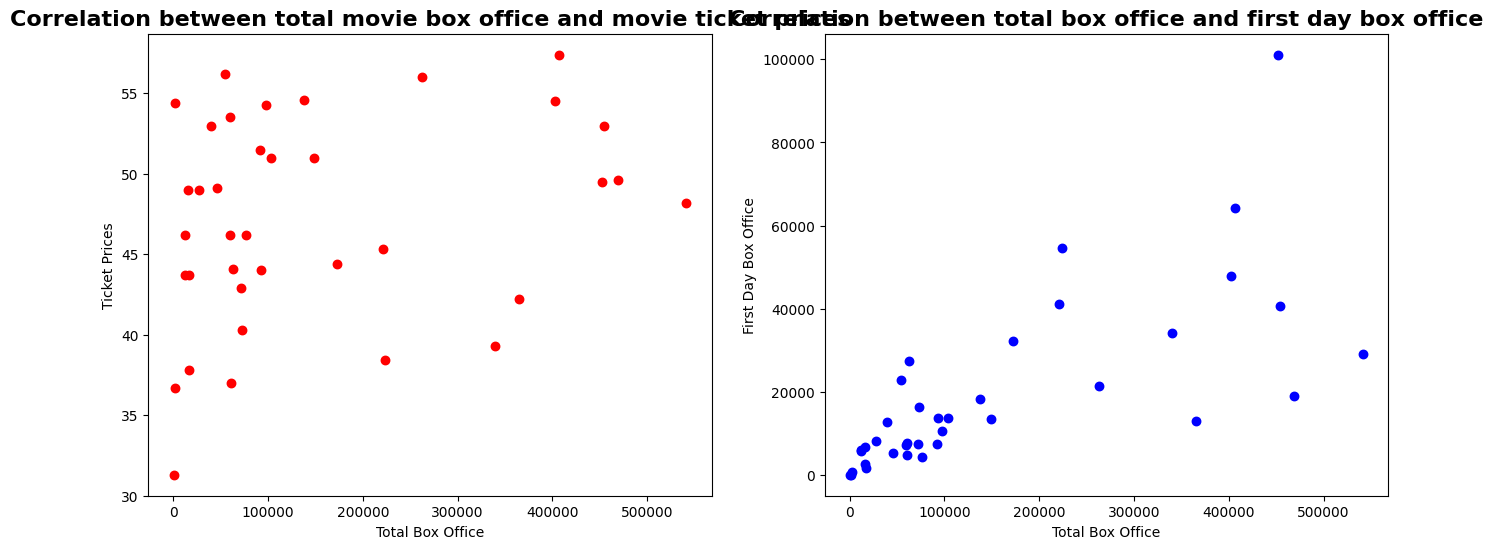

In [35]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.scatter(movievs['total_sell'], movievs['avg_price'], s=37, c='red')
plt.title('Correlation between total movie box office and movie ticket prices', fontsize=16, weight='bold')
plt.xlabel('Total Box Office')
plt.ylabel('Ticket Prices')
 
plt.subplot(122)
plt.scatter(movievs['total_sell'], movievs['first_day_sell'], s=37, c='blue')
plt.xlabel('Total Box Office')
plt.ylabel('First Day Box Office')
plt.title('Correlation between total box office and first day box office', fontsize=16, weight='bold')
plt.show()